# 112 INCIDENTS. Overview

0. [__Importing data__](#0)
    1. [Loading csv files](#0.1)
    2. [Loading shapefiles](#0.2)



1. [__Trial plots__](#1)
    1. [Number of 112 incidents per Catalonia regions](#1.1)
        1. [Regions](#1.1.1)
        2. [Counties](#1.1.2)
        3. [Municipalities](#1.1.3)
        
    2. [Time evolution of 112 incidents](#1.2)
        1. [Grouped by regions](#1.2.1)
        2. [Grouped by typology](#1.2.2)
    
    2. [112 incidents grouped by regions and typology](#1.3)

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from datetime import datetime

In [2]:
font = 11

# 0. Importing data <a class="anchor" id="0"></a>

In [3]:
data_dir = "../dades/"
preprocessed_data_dir = "preprocessed_data/"
fig_dir = "figures/"

## 0.1. Loading csv files <a class="anchor" id="0.1"></a>
We load the CSV files processed and convert the date into a datetime.

In [4]:
inc_112 = pd.read_csv(preprocessed_data_dir+"inc_112.csv")

inc_112['datetime'] = pd.to_datetime(inc_112['datetime'])

## 0.2. Loading shapefiles <a class="anchor" id="0.2"></a>
In order to create geographical maps, we nead the SHP files. We import the ones that divide Catalonia into regions, counties and municipalities.

In [5]:
cat_prov = gpd.read_file("cat/provincies/divisions-administratives-v2r1-provincies-100000-20230928.shx")
cat_comar = gpd.read_file("cat/comarques/divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat_muni = gpd.read_file("cat/municipis/divisions-administratives-v2r1-municipis-100000-20230928.shx")


In [6]:
comarques = ["Alt Camp","Alt Empordà","Alt Penedès","Alt Urgell","Alta Ribagorça","Anoia","Aran","Bages","Baix Camp",
             "Baix Ebre","Baix Empordà","Baix Llobregat","Baix Penedès","Barcelonès","Berguedà","Cerdanya",
             "Conca de Barberà","Garraf","Garrigues","Garrotxa","Gironès","Maresme","Moianès","Montsià",
             "Noguera","Osona","Pallars Jussà","Pallars Sobirà","Pla d'Urgell","Pla de l'Estany","Priorat",
             "Ribera d'Ebre","Ripollès","Segarra","Segrià","Selva","Solsonès","Tarragonès","Terra Alta",
             "Urgell","Vallès Occidental","Vallès Oriental"]

# 1. Trial plots <a class="anchor" id="1"></a>

## 1.1 Number of protection plans activated per Catalonia regions <a class="anchor" id="1.1"></a>

In [7]:
def geographical_map(cat_regions,number_cat_regions,
                      title_cat_regions_shp, title_cat_regions_pd,
                      number_label,
                      colorbar_label, ruta):
    "Function that returns a geographical map of a given data"
    # cat_regions: geopandas dataframe that divides Catalonia into regions.
    # number_cat_regions: dataframe that contains the number of cases we are interested in for each Catalonia region
    # title_cat_regions_shp: label of the Catalonia regions in the geopandas dataframe "cat_regions"
    # title_cat_regions_pd: label of the Catalonia regions in the dataframe "number_cat_regions"
    # number_label: how to name the number of the variable we are interested to plot geographically
    # colorbar_label: how to name the colorbar of the resulting figure
    # ruta: where to save the resulting figure
    
    # Merge between shapefile & data
    number_cat_regions_merge = cat_regions.merge(number_cat_regions, how='left', left_on=title_cat_regions_shp, right_on=title_cat_regions_pd)
    
    # Conserve original geometry
    number_cat_regions_merge_gpd = gpd.GeoDataFrame(number_cat_regions_merge, geometry="geometry")
    
    # Plot
    fig, ax = plt.subplots(figsize=(10,8))
    plot = number_cat_regions_merge_gpd.plot(column=number_label,
                                             cmap='Blues',
                                             norm = LogNorm(),
                                             ax=ax,
                                             legend=False)

    number_cat_regions_merge_gpd.boundary.plot(ax=ax, linewidth=0.5, color='black')

    cbar = fig.colorbar(plot.get_children()[0], ax=ax, label=colorbar_label)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_aspect('equal')

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    
    plt.savefig(ruta, dpi=500,bbox_inches='tight')

### 1.1.1. Regions <a class="anchor" id="1.1.1"></a>

In [8]:
inc_112.replace("BARCELONA","Barcelona", inplace=True)
inc_112.replace("LLEIDA","Lleida", inplace=True)
inc_112.replace("TARRAGONA","Tarragona", inplace=True)
inc_112.replace("GIRONA","Girona", inplace=True)

In [9]:
ninc_prov = inc_112.groupby('PROVINCIA').size().reset_index(name='# incidents')

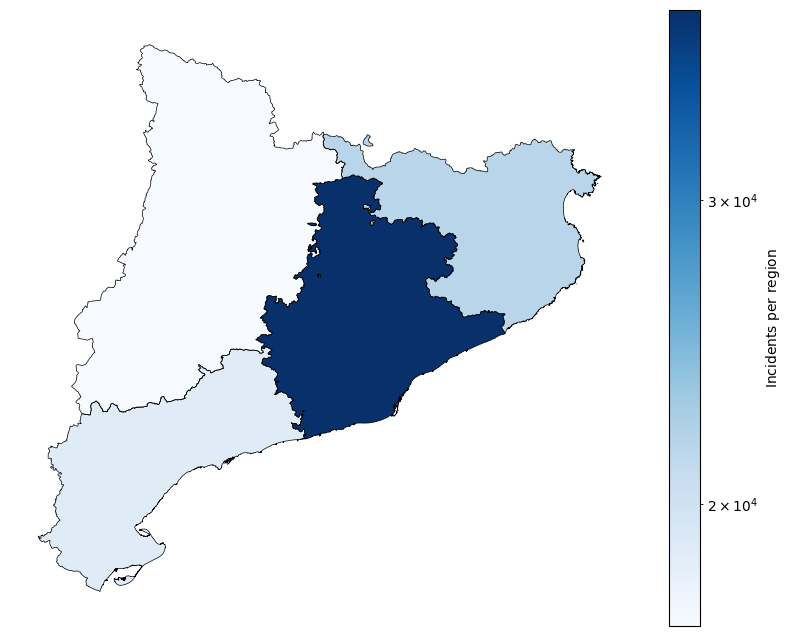

In [10]:
cat_regions = cat_prov
number_cat_regions = ninc_prov
title_cat_regions_shp = 'NOMPROV'
title_cat_regions_pd = 'PROVINCIA'
number_label = '# incidents'
colorbar_label = r'Incidents per $\text{region}$'
ruta = fig_dir+"112_incidents/112_incidents-geo_prov"

geographical_map(cat_regions,number_cat_regions,
                      title_cat_regions_shp, title_cat_regions_pd,
                      number_label,
                      colorbar_label, ruta)

### 1.1.2. Counties <a class="anchor" id="1.1.2"></a>

In [11]:
ninc_comar = inc_112.groupby('COMARCA').size().reset_index(name='# incidents')

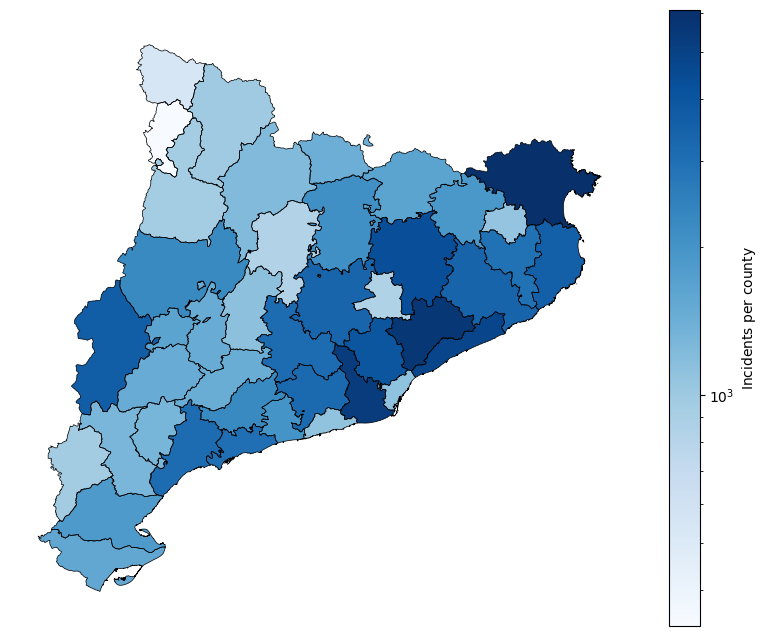

In [12]:
cat_regions = cat_comar
number_cat_regions = ninc_comar
title_cat_regions_shp = 'NOMCOMAR'
title_cat_regions_pd = 'COMARCA'
number_label = '# incidents'
colorbar_label = r'Incidents per $\text{county}$'
ruta = fig_dir+"112_incidents/112_incidents-geo_comar"

geographical_map(cat_regions,number_cat_regions,
                      title_cat_regions_shp, title_cat_regions_pd,
                      number_label,
                      colorbar_label, ruta)

### 1.1.3. Municipalities <a class="anchor" id="1.1.3"></a>

We replace the name of the municipalities from the SHP file using no accents and not capital letters :

In [13]:
import unicodedata

def noaccents(input_string):
    nfkd_form = unicodedata.normalize('NFKD', input_string)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

def shift_noaccents(input_string):
    string_sin_tildes = noaccents(input_string)
    return string_sin_tildes.upper()


for i in range(0,len(cat_muni["NOMMUNI"])):
    cat_muni["NOMMUNI"][i] = shift_noaccents(cat_muni["NOMMUNI"][i])

cat_muni.head()

/var/folders/93/12z5kvyx445470bf3l70prdc0000gn/T/ipykernel_98732/1880096432.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_muni["NOMMUNI"][i] = shift_noaccents(cat_muni["NOMMUNI"][i])


,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,ABELLA DE LA CONCA,Abella de la Conca,77.970100,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346678.012 4677003.965, 346688.592 4..."
1,080018,ABRERA,Abrera,19.978100,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
2,250024,AGER,Àger,160.202600,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,AGRAMUNT,Agramunt,79.359535,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 342566..."
4,080023,AGUILAR DE SEGARRA,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((384343.603 4625174.347, 384397.036 4..."


In [14]:
ninc_muni = inc_112.groupby('MUNICIPI').size().reset_index(name='# incidents')

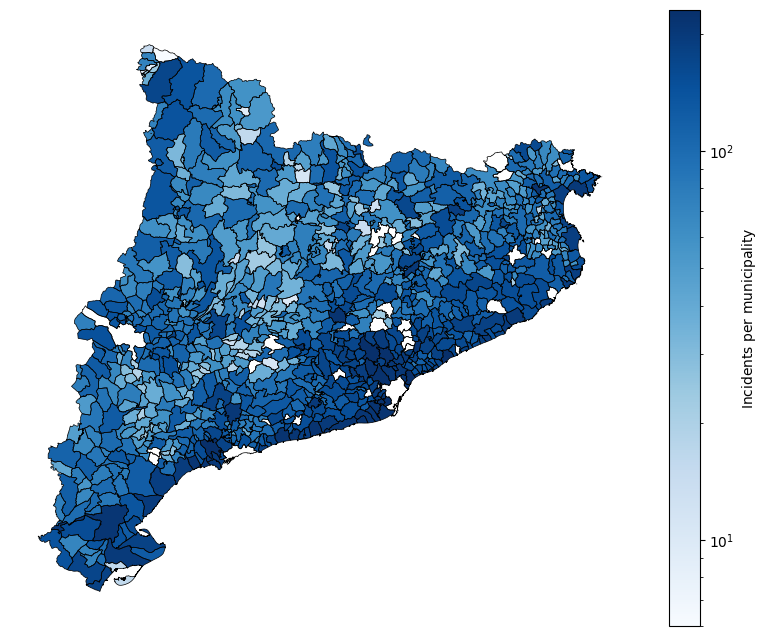

In [15]:
cat_regions = cat_muni
number_cat_regions = ninc_muni
title_cat_regions_shp = 'NOMMUNI'
title_cat_regions_pd = 'MUNICIPI'
number_label = '# incidents'
colorbar_label = r'Incidents per $\text{municipality}$'
ruta = fig_dir+"112_incidents/112_incidents-geo_muni"

geographical_map(cat_regions,number_cat_regions,
                      title_cat_regions_shp, title_cat_regions_pd,
                      number_label,
                      colorbar_label, ruta)

## 1.2. Time evolution of 112 incidents <a class="anchor" id="1.2"></a>

### 1.2.1. Grouped by regions  <a class="anchor" id="1.2.1"></a>

In [16]:
ninc_prov = pd.DataFrame({"PROVINCIA":[],"# incidents":[],"year":[]})

selected_years = np.arange(2018,2023)

for i in range(len(selected_years)):
    inc_112_year = inc_112[(inc_112["datetime"].dt.year == selected_years[i])]
    ninc_year_prov = inc_112_year.groupby('PROVINCIA').size().reset_index(name=f'# incidents')
    ninc_year_prov["year"] = int(selected_years[i])
    
    ninc_prov = pd.concat([ninc_prov,ninc_year_prov])

In [17]:
ninc_prov["year"] = ninc_prov["year"].astype(int)
ninc_prov["# incidents"] = ninc_prov["# incidents"].astype(int)
ninc_prov

,PROVINCIA,# incidents,year
0,Barcelona,7646,2018
1,Girona,4284,2018
2,Lleida,3119,2018
3,Tarragona,3674,2018
0,Barcelona,7781,2019
1,Girona,4346,2019
2,Lleida,3325,2019
3,Tarragona,3796,2019
0,Barcelona,7745,2020
1,Girona,4294,2020


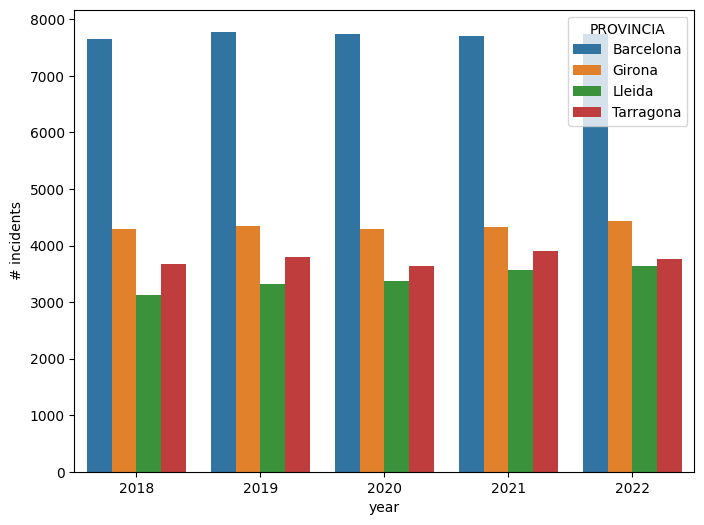

In [18]:
plt.figure(figsize=(8, 6))

sns.barplot(data=ninc_prov,  x="year",y="# incidents", hue="PROVINCIA", dodge=True)

ruta = fig_dir+"112_incidents/112_incidents-year_prov"
plt.savefig(ruta, dpi=500,bbox_inches='tight')

### 1.2.2. Grouped by typology  <a class="anchor" id="1.2.2"></a>

In [19]:
ninc_type = pd.DataFrame({"TIPUS":[],"# incidents":[],"year":[]})

selected_years = np.arange(2018,2023)

for i in range(len(selected_years)):
    inc_112_year = inc_112[(inc_112["datetime"].dt.year == selected_years[i])]
    ninc_year_type = inc_112_year.groupby('TIPUS').size().reset_index(name=f'# incidents')
    ninc_year_type["year"] = int(selected_years[i])
    
    ninc_type = pd.concat([ninc_type,ninc_year_type])

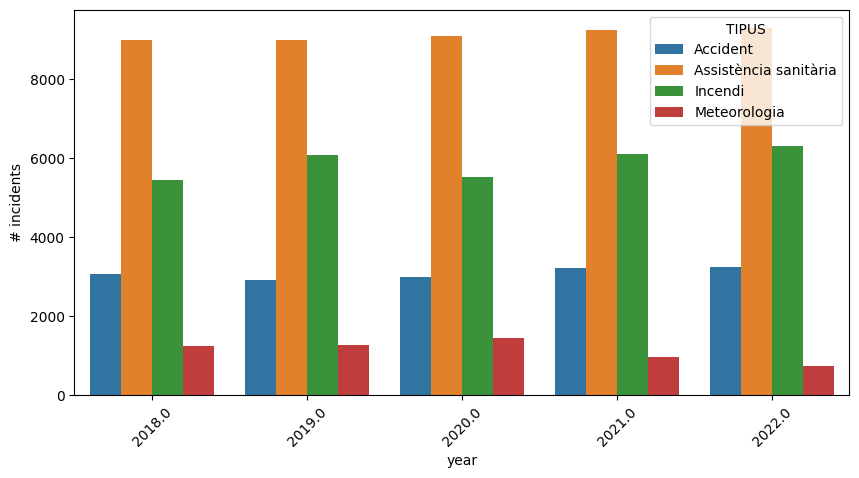

In [20]:
plt.figure(figsize=(10, 5))

sns.barplot(data=ninc_type,  x="year",y="# incidents", hue="TIPUS", dodge=True)

plt.xticks(rotation = 45)

ruta = fig_dir+"112_incidents/112_incidents-year_type"
plt.savefig(ruta, dpi=500,bbox_inches='tight')

## 1.2. 112 incidents grouped by regions and typology <a class="anchor" id="1.2"></a>

In [21]:
ninc_type_prov = inc_112.groupby(['TIPUS',"PROVINCIA"]).size().reset_index(name='# incidents')
ninc_type_prov

,TIPUS,PROVINCIA,# incidents
0,Accident,Barcelona,7399
1,Accident,Girona,3283
2,Accident,Lleida,2126
3,Accident,Tarragona,2578
4,Assistència sanitària,Barcelona,16309
5,Assistència sanitària,Girona,10957
6,Assistència sanitària,Lleida,9276
7,Assistència sanitària,Tarragona,9084
8,Incendi,Barcelona,12032
9,Incendi,Girona,6368


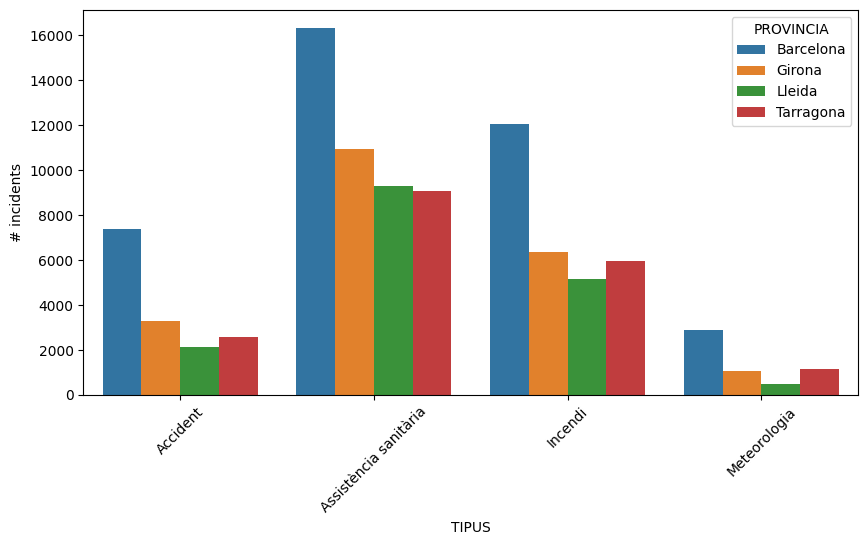

In [22]:
plt.figure(figsize=(10, 5))

sns.barplot(data=ninc_type_prov,  x="TIPUS",y="# incidents", hue="PROVINCIA", dodge=True)

plt.xticks(rotation = 45)

ruta = fig_dir+"112_incidents/112_incidents-type_prov"
plt.savefig(ruta, dpi=500,bbox_inches='tight')